In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
from data_cleaning import full_clean
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Add these to data cleaning

In [273]:
clean_data['is_home'] = (clean_data.game_home_team_id == clean_data.team_id).astype(int)
clean_data['home_won'] = (clean_data.game_home_team_score >= clean_data.game_visitor_team_score).astype(int)
clean_data['home_spread'] = (clean_data.game_home_team_score - clean_data.game_visitor_team_score).astype(int)
clean_data['away_spread'] = (clean_data.game_visitor_team_score - clean_data.game_home_team_score).astype(int)
clean_data = clean_data[clean_data['game_postseason'] == False] # Regular season

In [300]:
def cohen_d(group1, group2):
    """Compute Cohen's d."""

    diff = abs(group1.mean() - group2.mean())

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

In [210]:
LA = 'Los Angeles Lakers'
BUCKS = 'Milwaukee Bucks'
GS = 'Golden State Warriors'

In [129]:
clean_data = full_clean()

Null H: Lebron early career has same mean as later career.

Alt H: Early and later career do not have the same mean score.

In [104]:
alpha = .05
effect_size = .8
power = .8

sample_size = TTestIndPower().solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
# Necessary sample size
sample_size

25.52457250047935

# Spread betting? 

In [224]:
team_wins = clean_data.loc[clean_data.game_season > 2008, ['game_date', 'team_full_name', 
                                                            'is_home', 'home_won', 'game_home_team_score', 
                                                            'game_visitor_team_score', 'home_spread', 'away_spread']].copy()

In [225]:
team_wins = team_wins.drop_duplicates()

### 1 Home vs Away for all teams 2015-2018

In [226]:
home_teams = team_wins.loc[(team_wins.is_home == 1)]

In [228]:
away_teams = team_wins.loc[(team_wins.is_home == 0)]

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


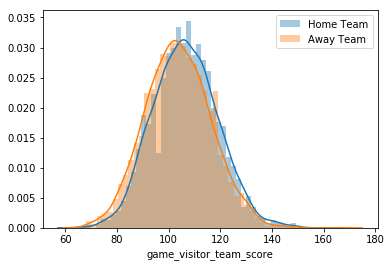

In [302]:
sns.distplot(home_teams.game_home_team_score, label='Home Team')
sns.distplot(away_teams.game_visitor_team_score, label='Away Team')
plt.legend()

In [231]:
stats.ttest_ind(home_teams.game_home_team_score, away_teams.game_visitor_team_score, equal_var=False)

Ttest_indResult(statistic=12.396921613719309, pvalue=4.321851086681267e-35)

In [233]:
cohen_d(home_teams.game_home_team_score, away_teams.game_visitor_team_score)

0.21938156637595344

#### Home team advantage, but effect is small ~.2

### 2) Bucks top team of 2018.  Home vs. Away point spread.

In [280]:
bucks = clean_data.loc[clean_data.team_full_name == BUCKS, ['game_date', 'team_full_name', 
                                                            'is_home', 'home_won', 'game_home_team_score', 
                                                            'game_visitor_team_score', 'home_spread', 'away_spread', 'game_season']].copy().drop_duplicates()

#### Bucks spead home vs away.  maybe boxplot viz

In [212]:
bucks_home_spread = bucks.loc[bucks.is_home == 1, ['home_spread']]
bucks_away_spread = bucks.loc[bucks.is_home == 0, ['away_spread']]

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


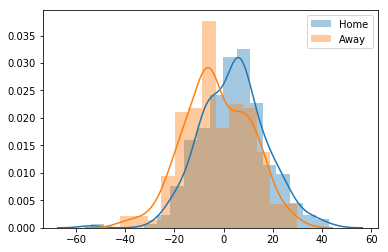

In [213]:
sns.distplot(bucks_home_spread, label='Home')
sns.distplot(bucks_away_spread, label='Away')
plt.legend()

In [214]:
stats.ttest_ind(bucks_home_spread, bucks_away_spread, equal_var=False)

Ttest_indResult(statistic=array([5.25968732]), pvalue=array([2.15693795e-07]))

In [218]:
cohen_d(bucks_home_spread.home_spread, bucks_away_spread.away_spread)

0.47330761131306537

### 4) Giannis Home vs Away points

In [304]:
giannis = clean_data.loc[(clean_data.player_first_name == 'Giannis') & (clean_data.player_last_name == 'Antetokounmpo')
                        & clean_data.game_season.isin([2017, 2018])]
giannis = giannis.reset_index()

In [306]:
giannis_home = giannis.loc[giannis.is_home == 1, ['pts']]

In [307]:
giannis_away = giannis.loc[giannis.is_home == 0, ['pts']]

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


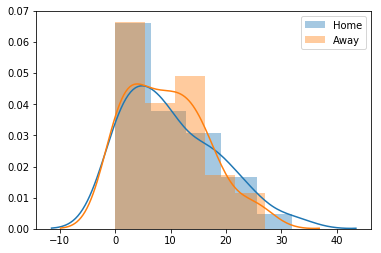

In [308]:
sns.distplot(giannis_home, label='Home')
sns.distplot(giannis_away, label='Away')
plt.legend()

In [309]:
stats.ttest_ind(giannis_home, giannis_away, equal_var=False)

Ttest_indResult(statistic=array([0.61651233]), pvalue=array([0.53866899]))

### 3) Bucks 2017 vs 2018 Points scored.

In [281]:
bucks_2017 = bucks.loc[bucks.game_season == 2017]

In [283]:
bucks_2018 = bucks.loc[bucks.game_season == 2018]

In [294]:
bucks_2017_final = pd.concat([bucks_2017.loc[(bucks_2017.is_home == 1), 'game_home_team_score'], \
           bucks_2017.loc[(bucks_2017.is_home == 0), 'game_visitor_team_score']])

In [295]:
bucks_2018_final = pd.concat([bucks_2018.loc[(bucks_2018.is_home == 1), 'game_home_team_score'], \
           bucks_2018.loc[(bucks_2018.is_home == 0), 'game_visitor_team_score']])

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


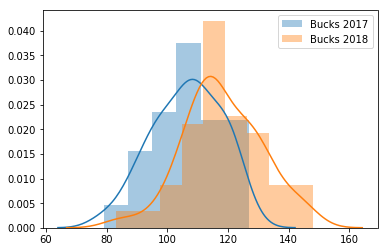

In [297]:
sns.distplot(bucks_2017_final, label='Bucks 2017')
sns.distplot(bucks_2018_final, label='Bucks 2018')
plt.legend()

In [298]:
stats.ttest_ind(bucks_2017_final, bucks_2018_final, equal_var=False)

Ttest_indResult(statistic=-6.1232477209006495, pvalue=7.304729000383075e-09)

In [301]:
cohen_d(bucks_2017_final, bucks_2018_final)

0.9719966608139783